<a href="https://colab.research.google.com/github/KuenzliJ/BINA/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importieren der benötigten Libaries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importieren des Datensets

In [4]:
dataset_path = "https://raw.githubusercontent.com/KuenzliJ/BINA/refs/heads/main/Daten/netflix_titles.csv"
df = pd.read_csv(dataset_path)

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Löschen der Description da diese nicht gebraucht wird

In [7]:
df = df.drop("description", axis = 1)

Löschen der leeren Zeilen

In [10]:
new_df = df.dropna()

In [17]:
new_df.shape

(5332, 11)

In [18]:
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies"
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"


In [47]:
country_list = new_df['country'].str.split(',').explode().str.strip()

In [48]:
counted_countries = country_list.value_counts()

In [32]:
print(counted_countries)

country
United States     2485
India              940
United Kingdom     485
Canada             295
France             293
                  ... 
Albania              1
Georgia              1
Cameroon             1
Bermuda              1
Montenegro           1
Name: count, Length: 110, dtype: int64


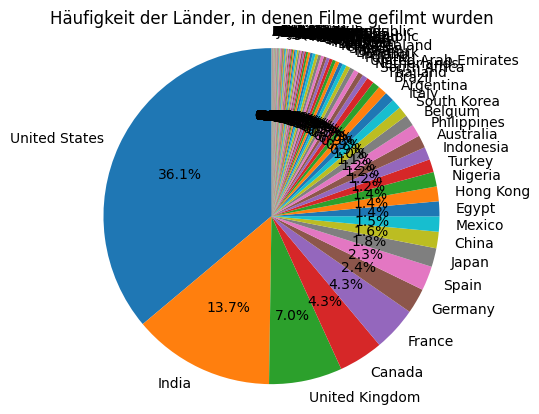

In [33]:
plt.pie(counted_countries, labels=counted_countries.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Damit der Kreis gleichmäßig aussieht
plt.title('Häufigkeit der Länder, in denen Filme gefilmt wurden')
plt.show()

In [49]:
percentages = counted_countries / counted_countries.sum() *100

In [50]:
others = percentages[percentages < 2].index
counted_countries.loc['Others'] = counted_countries[others].sum()

In [55]:
counted_countries = counted_countries.drop(others)

In [56]:
print(counted_countries)

country
United States     2485
India              940
United Kingdom     485
Canada             295
France             293
Germany            167
Spain              161
Others            2056
Name: count, dtype: int64


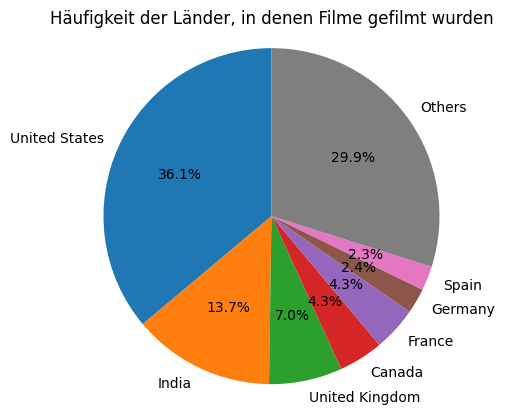

In [57]:
plt.pie(counted_countries, labels=counted_countries.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Damit der Kreis gleichmäßig aussieht
plt.title('Häufigkeit der Länder, in denen Filme gefilmt wurden')
plt.show()